In [55]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
whole_form_df = pd.read_csv('/Volumes/NO NAME/sleeper/form_responses.csv')

In [4]:
whole_form_df.head()

,Timestamp,Section,Hours,Rate sleep,Feeling of rested,Difficulty waking up,Notes & Comments,Unnamed: 7,Time correction,Time statement,...,Time.1,Period in day.1,Type,Current disposition.1,Current disposition.2,Current Disposition,Unnamed: 24,Current disposition.3,Current disposition.4,Did you exercise yet today?.1
0,3/12/19 6:12,NaN,5.0,3.0,2.0,3.0,20 minutes to wake up. \r,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/13/19 0:50,Sleep anticipation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/13/19 6:07,Sleep Review,5.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/13/19 6:49,Coffee or tea,NaN,NaN,NaN,NaN,NaN,Coffee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/13/19 9:55,Coffee or tea,NaN,NaN,NaN,NaN,NaN,Coffee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
whole_form_df.columns

Index(['Timestamp', 'Section', 'Hours', 'Rate sleep', 'Feeling of rested',
       'Difficulty waking up', 'Notes & Comments', 'Unnamed: 7',
       'Time correction', 'Time statement', 'About to sleep',
       'Current disposition', 'Time', 'Relative Amount', 'Notes', 'Ear plugs?',
       'Period in day', 'Did you exercise yet today?', 'Time.1',
       'Period in day.1', 'Type', 'Current disposition.1',
       'Current disposition.2', 'Current Disposition', 'Unnamed: 24',
       'Current disposition.3', 'Current disposition.4',
       'Did you exercise yet today?.1'],
      dtype='object')

In [65]:
caffeine_dict_coffee = {
    'Starbucks amount (larger amount, but likely less caffeinated?)': 8,
    'Large cup (morning amount)': 8,
    'Small cup': 4,
    'Blue Java cup': 6,
    'Thermos': 6
                        }
caffeine_dict_tea = {
    'Starbucks amount (larger amount, but likely less caffeinated?)': 4,
    'Large cup (morning amount)': 4,
    'Small cup': 2,
    'Blue Java cup': 3,
    'Thermos': 3
                        }

In [66]:
selected = whole_form_df[['Timestamp', 'Section', 'Time statement', 
                          'Unnamed: 7', 'Relative Amount']]
selected = selected.rename(columns={"Unnamed: 7": "Drink"})
selected = selected.loc[selected['Section'] == 'Coffee or tea']
selected = selected[pd.notnull(selected['Relative Amount'])]
selected = selected.drop('Section', axis=1)
selected['Date'] = selected['Timestamp'].apply(lambda x: pd.Timestamp(x.split()[0]))
selected['Time'] = selected[['Date','Time statement']].apply(lambda x: 
                                                             pd.Timestamp("{} {}".format(
                                                                 str(x['Date'].date()),
                                                                 x['Time statement'])),
                                                     axis=1)
selected = selected.drop(['Timestamp','Time statement'], axis=1)
selected['caffiene'] = pd.concat(
    [selected.loc[selected['Drink']=='Tea']['Relative Amount']
                        .map(caffeine_dict_tea),
    selected.loc[selected['Drink']=='Coffee']['Relative Amount']
                        .map(caffeine_dict_coffee)])
selected

,Drink,Relative Amount,Date,Time,caffiene
26,Coffee,"Starbucks amount (larger amount, but likely le...",2019-03-22,2019-03-22 10:30:00,8
29,Coffee,"Starbucks amount (larger amount, but likely le...",2019-03-24,2019-03-24 08:10:00,8
32,Coffee,Large cup (morning amount),2019-03-25,2019-03-25 06:45:00,8
33,Coffee,Large cup (morning amount),2019-03-25,2019-03-25 09:00:00,8
34,Tea,Small cup,2019-03-25,2019-03-25 19:30:00,2
37,Coffee,Large cup (morning amount),2019-03-26,2019-03-26 06:30:00,8
38,Coffee,Blue Java cup,2019-03-26,2019-03-26 08:40:00,6
39,Tea,Blue Java cup,2019-03-26,2019-03-26 17:30:00,3
44,Coffee,Large cup (morning amount),2019-03-27,2019-03-27 06:45:00,8
46,Coffee,Blue Java cup,2019-03-27,2019-03-27 09:00:00,6


In [67]:
caffiene_totals = selected.groupby('Date').sum().reset_index()
caffiene_totals

,Date,caffiene
0,2019-03-22,8
1,2019-03-24,8
2,2019-03-25,18
3,2019-03-26,17
4,2019-03-27,14
5,2019-03-28,16
6,2019-03-31,8
7,2019-04-01,20
8,2019-04-02,19
9,2019-04-03,14


<Figure size 1440x1008 with 0 Axes>

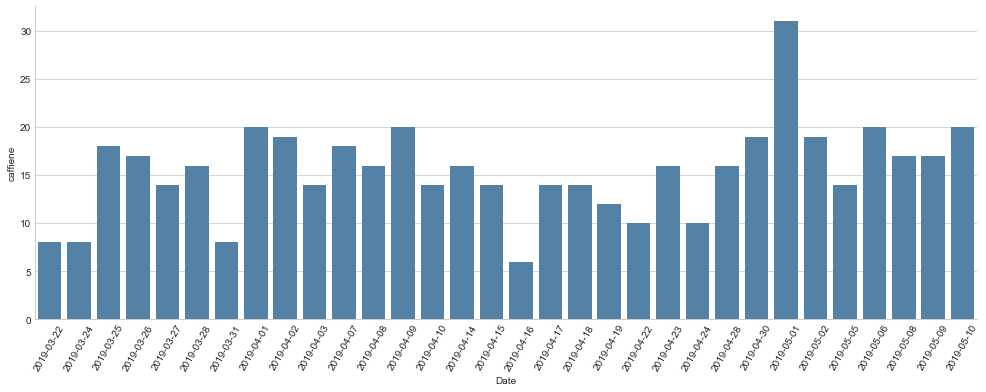

In [100]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20., 14.))
g = sns.catplot(x="Date", y="caffiene", data=caffiene_totals, aspect=3, kind='bar',color='steelblue')
g.set_xticklabels(caffiene_totals['Date'].astype(str),rotation=60)
plt.show()